In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
SEED = 42
# dataset_folder = "datasets/financial"
dataset_folder = "datasets/healthcare"
# dataset_folder = "datasets/eligibility"


# Init memories

In [3]:
import os

from caia.memory import WorkingMemory, EpisodicMemory, SemanticMemory
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
import json

from docarray import BaseDoc, DocList
from typing import Tuple, List
from rich import print

df_old = pd.read_csv(f"{dataset_folder}/initial.csv")
df_new = pd.read_csv(f"{dataset_folder}/drifted.csv")

with open(f'{dataset_folder}/dataset_description.json', 'r') as f:
    dataset_description = json.load(f)

# Split initial dataset into training and testing sets
label_name = dataset_description["LABEL"]
X_old = df_old.drop(columns=[label_name])
y_old = df_old[label_name]
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old, y_old, 
                                                                                            test_size=0.3, random_state=SEED)

# Save the split datasets
X_train_old.to_csv(f"{dataset_folder}/X_train_old.csv", index=False)
X_test_old.to_csv(f"{dataset_folder}/X_test_old.csv", index=False)
y_train_old.to_csv(f"{dataset_folder}/y_train_old.csv", index=False)
y_test_old.to_csv(f"{dataset_folder}/y_test_old.csv", index=False)

# Split drifted dataset into training and testing sets
percentage = 0.1
X_new = df_new.drop(columns=[label_name]).sample(frac=percentage, random_state=SEED)
# y_new = df_new[label_name].sample(frac=percentage)
y_new = df_new[label_name].sample(frac=percentage, random_state=SEED)
print(f"Drifted dataset: {len(X_new)} samples")

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, 
                                                                    test_size=0.3, random_state=SEED)

# Save the split datasets
X_train_new.to_csv(f"{dataset_folder}/X_train_new.csv", index=False)
X_test_new.to_csv(f"{dataset_folder}/X_test_new.csv", index=False)
y_train_new.to_csv(f"{dataset_folder}/y_train_new.csv", index=False)
y_test_new.to_csv(f"{dataset_folder}/y_test_new.csv", index=False)

print(f"Drifted dataset: Training: {len(X_train_new)} samples, Testing: {len(X_test_new)} samples")
X_train_new.head()

Drifted dataset: 510 samples

Drifted dataset: Training: 357 samples, Testing: 153 samples

,Setting_1,Setting_2,LPC_outlet_temperature,HPC_outlet_temperature,LPT_outlet_temperature,Bypass_duct_pressure,HPC_outlet_pressure,Physical_fan_speed,Physical_core_speed,HPC_outlet_static_pressure,Fuel_flow_ratio,Corrected_fan_speed,Bypass_ratio,Bleed_enthalpy,HPT_cool_air_flow,LPT_cool_air_flow
5083,-0.0000,0.0002,643.38,1599.31,1422.98,21.61,552.23,2388.13,9068.20,48.02,520.58,2388.14,8.5051,395,38.58,23.1495
4500,0.0011,-0.0004,643.14,1595.09,1420.25,21.61,553.35,2388.08,9114.28,47.77,520.63,2388.06,8.4438,395,38.67,23.0958
4857,-0.0016,0.0002,643.04,1596.44,1427.80,21.61,552.45,2388.18,9041.65,47.86,519.96,2388.21,8.5263,395,38.52,23.1810
1436,0.0022,-0.0000,644.07,1602.77,1429.18,21.61,551.15,2388.32,9043.30,48.08,519.65,2388.25,8.5153,394,38.48,23.0406
2480,-0.0023,-0.0002,642.97,1587.76,1403.83,21.61,553.71,2388.10,9049.55,47.51,521.65,2388.10,8.3939,393,38.74,23.2801


## Training code

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# load the old data
dataset_folder = "datasets/nasa"
X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")
X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")
y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")
y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")

model_old = RandomForestRegressor(random_state=42)


model_old.fit(X_train_old, y_train_old)

# Test the model on the old test set
old_accuracy = model_old.score(X_test_old, y_test_old)

print(f'Model trained and evaluated on the old distribution: {old_accuracy}')

Model trained and evaluated on the old distribution: 0.35173584068312325


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# load the old data
# dataset_folder = "datasets/financial"
X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")
X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")
y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")
y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")

model_old = RandomForestClassifier(random_state=42)


model_old.fit(X_train_old, y_train_old)

# Test the model on the old test set
old_accuracy = model_old.score(X_test_old, y_test_old)

print(f'Model trained and evaluated on the old distribution: {old_accuracy}')

Model trained and evaluated on the old distribution: 0.3409073546009901

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# load the reference data
X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")
X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")
y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")
y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")

print(f"X_train_old shape: {X_train_old.shape}")
print(f"X_test_old shape: {X_test_old.shape}")

model_old = RandomForestClassifier(random_state=SEED)
model_old.fit(X_train_old, y_train_old)

# Test the model on the initial test set
initial_accuracy = model_old.score(X_test_old, y_test_old)

print(f'Model trained and evaluated on the old distribution: {initial_accuracy}')

# Test the model on the drifted test set
X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")
y_test_new = pd.read_csv(f"{dataset_folder}/y_test_new.csv").squeeze("columns")

print(f"X_test_new shape: {X_test_new.shape}")
drifted_accuracy = model_old.score(X_test_new, y_test_new)
print(f'Model evaluated on the new distribution: {drifted_accuracy}')

# calcualte the average accuracy
average_accuracy = (initial_accuracy + drifted_accuracy) / 2
print(f'Average accuracy on both distributions: {average_accuracy}')

X_train_old shape: (700, 5)

X_test_old shape: (300, 5)

Model trained and evaluated on the old distribution: 0.7833333333333333

X_test_new shape: (30, 5)

Model evaluated on the new distribution: 0.6333333333333333

Average accuracy on both distributions: 0.7083333333333333

In [5]:
from caia.utils import get_model_params

print(get_model_params(model_old))

{
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'monotonic_cst': None,
    'n_estimators': 100,
    'n_jobs': None,
    'oob_score': False,
    'random_state': 42,
    'verbose': 0,
    'warm_start': False
}

## Retrain code with new data

In [6]:
# write the retraining code including the read_csv
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# load the reference data
X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")
X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")
y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")
y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")

# load the drifted data
X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")
X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")
y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")
y_test_new = pd.read_csv(f"{dataset_folder}/y_test_new.csv").squeeze("columns")

X_train = pd.concat([X_train_old, X_train_new])
y_train = pd.concat([y_train_old, y_train_new])

# Now train the model on the combined dataset
model_new = RandomForestClassifier(random_state=SEED)
model_new.fit(X_train, y_train)

# Test the model on the initial test set
initial_accuracy = model_new.score(X_test_old, y_test_old)
print(f'Model trained on the old distribution and evaluated on the old distribution: {initial_accuracy}')

# Test the model on the drifted test set
drifted_accuracy = model_new.score(X_test_new, y_test_new)
print(f'Model trained on the old distribution and evaluated on the drifted distribution: {drifted_accuracy}')
# calculate the average accuracy
average_accuracy = (initial_accuracy + drifted_accuracy) / 2
print(f'Average accuracy: {average_accuracy}')



Model trained on the old distribution and evaluated on the old distribution: 0.87

Model trained on the old distribution and evaluated on the drifted distribution: 0.8333333333333334

Average accuracy: 0.8516666666666667

# Retrain with new data and new code

In [7]:
# write the retraining code including the read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import
from sklearn.metrics import accuracy_score

# load the old data
X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")
X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")
y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")
y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")

# load the drifted data
X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")
X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")
y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")
y_test_new = pd.read_csv(f"{dataset_folder}/y_test_new.csv").squeeze("columns")

X_train = pd.concat([X_train_old, X_train_new])
y_train = pd.concat([y_train_old, y_train_new])


model_new = RandomForestClassifier(n_estimators=150, random_state=42)

model_new.fit(X_train, y_train)

# Test the model on the initial test set
initial_accuracy = model_new.score(X_test_old, y_test_old)
print(f'Model trained on the old distribution and evaluated on the old distribution: {initial_accuracy}')

# Test the model on the drifted test set
drifted_accuracy = model_new.score(X_test_new, y_test_new)
print(f'Model trained on the old distribution and evaluated on the drifted distribution: {drifted_accuracy}')
# calculate the average accuracy
average_accuracy = (initial_accuracy + drifted_accuracy) / 2
print(f'Average accuracy: {average_accuracy}')



Model trained on the old distribution and evaluated on the old distribution: 0.9183333333333333

Model trained on the old distribution and evaluated on the drifted distribution: 0.8166666666666667

Average accuracy: 0.8674999999999999

In [8]:
print(get_model_params(model_new))

{
    'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'monotonic_cst': None,
    'n_estimators': 150,
    'n_jobs': None,
    'oob_score': False,
    'random_state': 42,
    'verbose': 0,
    'warm_start': False
}

## Semantic memory

In [9]:
# from caia.tools import get_tools
# from caia.tools import calculate_trust_score
from caia.memory import Dataset


# tools = get_tools([calculate_trust_score])


# At the beginning, the agent has 1 entry in the semantic memory. 
# Here we put the path of each dataset file in the semantic memory.
dataset_old = Dataset(X_train=f"{dataset_folder}/X_train_old.csv",
                                     X_test=f"{dataset_folder}/X_test_old.csv",
                                     y_train=f"{dataset_folder}/y_train_old.csv",
                                     y_test=f"{dataset_folder}/y_test_old.csv",
                                     description=dataset_description)

model_code = """
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# load the old data
dataset_folder = "datasets/financial"
X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")
X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")
y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")
y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")

model_old = RandomForestClassifier(random_state=42)


model_old.fit(X_train_old, y_train_old)

# Test the model on the old test set
old_accuracy = model_old.score(X_test_old, y_test_old)

print(f'Model trained and evaluated on the old distribution: {old_accuracy}')
"""

init_semantic_memory = SemanticMemory(dataset_old=dataset_old, 
                                        model_object=model_old, 
                                        model_code=model_code)
# semantic_memory
print(init_semantic_memory.model_code)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# load the old data
dataset_folder = "datasets/financial"
X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")
X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")
y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")
y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")

model_old = RandomForestClassifier(random_state=42)


model_old.fit(X_train_old, y_train_old)

# Test the model on the old test set
old_accuracy = model_old.score(X_test_old, y_test_old)

print(f'Model trained and evaluated on the old distribution: {old_accuracy}')

## Episodic memory

In [10]:
from caia.memory import Dataset


# tools = get_tools([calculate_trust_score])


# At the beginning, the agent has 1 entry in the semantic memory. 
# Here we put the path of each dataset file in the semantic memory.
dataset_new = Dataset(X_train=f"{dataset_folder}/X_train_new.csv",
                        X_test=f"{dataset_folder}/X_test_new.csv",
                        y_train=f"{dataset_folder}/y_train_new.csv",
                        y_test=f"{dataset_folder}/y_test_new.csv",
                        description=dataset_description)


# dataset_new = NewDataset(X=X_train_new, y=None, description=dataset_description)
# first_episodic_memory = EpisodicMemory(dataset_new=dataset_new,
#                                        quick_insight={},
#                                        deep_insight={})



first_episodic_memory = EpisodicMemory(dataset_new=dataset_new,
                                        quick_insight={},
                                       deep_insight={})
init_episodic_memory = DocList[EpisodicMemory]([first_episodic_memory])
init_episodic_memory[0]


📄 EpisodicMemory : 299cb24 ...
╭────────────────────────────┬─────────╮
│ Attribute                  │ Value   │
├────────────────────────────┼─────────┤
│ quick_insight: dict        │ {}      │
│ deep_insight: dict         │ {}      │
╰────────────────────────────┴─────────╯
└── 🔶 dataset_new: Dataset
    └── 📄 Dataset : dae080b ...
        ╭───────────────────┬───────────────────────────────────────────────────────────────────────╮
        │ Attribute         │ Value                                                                 │
        ├───────────────────┼───────────────────────────────────────────────────────────────────────┤
        │ X_train: str      │ datasets/financial/X_train_new.csv                                    │
        │ X_test: str       │ datasets/financial/X_test_new.csv                                     │
        │ y_train: str      │ datasets/financial/y_train_new.csv                                    │
        │ y_test: str       │ datasets/financial/y_test_new.csv                                     │
        │ description: dict │ {'NUM_SAMPLES': 2000, 'FEATURES': ['Age', 'Income' ... } (length: 11) │
        ╰───────────────────┴───────────────────────────────────────────────────────────────────────╯

## caia report/answers

In [64]:
from caia.fast.fast_graph import FastGraph
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_community.cache import SQLiteCache
from langchain.globals import set_llm_cache


load_dotenv("env")
set_llm_cache(SQLiteCache(database_path=".cache_langchain.db"))

dataset_folder = "datasets/financial"
llm_name = "llama-3.2-3b-preview"
# llm_name = "llama-3.1-8b-instant"
# llm_name = "llama-3.2-1b-preview"
# llm_name = "llama-3.1-70b-versatile"
# llm_name = "llama3-70b-8192"


llm_generator = ChatGroq(cache=True, temperature=0.5, model_name=llm_name)
llm_generator

ChatGroq(cache=True, client=<groq.resources.chat.completions.Completions object at 0x7f402db2dd10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f402db30b10>, model_name='llama-3.2-3b-preview', temperature=0.5, groq_api_key=SecretStr('**********'))

## Fast graph

In [ ]:


working_memory = WorkingMemory(
    episodic_memory=init_episodic_memory,
    semantic_memory=init_semantic_memory,

    threshold=0.05,
    generations_fast_graph={},
    generations_slow_graph={},
    improvement_history=[] 
)
# working_memory
fast_graph = FastGraph(llm_generator, debug=False)
output_fast_graph = fast_graph.run(working_memory)


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                         Node: generate_retraining_code                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── new_training_code ───────────────────────────────────────────────╮
│ new_training_code: |                                                                                            │
│     import pandas as pd                                                                                         │
│     from sklearn.ensemble import RandomForestClassifier                                                         │
│     import yaml                                                                                                 │
│                                                                                                                 │
│     # Initialize metrics dictionaries                                                                           │
│     model_new_score = {                                                                                         │
│         'on_new_data': 0.0,                                                                                     │
│         'on_old_data': 0.0                                                                                      │
│     }                                                                                                           │
│     model_old_score = {                                                                                         │
│         'on_new_data': 0.0,                                                                                     │
│         'on_old_data': 0.0                                                                                      │
│     }                                                                                                           │
│                                                                                                                 │
│     # load the old data                                                                                         │
│     dataset_folder = "datasets/financial"                                                                       │
│     X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                              │
│     X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                                │
│     y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")                           │
│     y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                             │
│                                                                                                                 │
│     model_old = RandomForestClassifier(random_state=42)                                                         │
│     model_old.fit(X_train_old, y_train_old)                                                                     │
│                                                                                                                 │
│     # Test the old model on the old test set                                                                    │
│     old_accuracy = model_old.score(X_test_old, y_test_old)                                                      │
│     print(f'Model trained and evaluated on the old distribution: {old_accuracy}')                               │
│     model_old_score['on_old_data'] = float(old_accuracy)                                                        │
│                                                                                                                 │
│     # Test the old model on the new test set                                                                    │
│     old_accuracy_new = model_old.score(X_test_new, y_test_new)                                                  │
│     print(f'Old model evaluated on the new distribution: {old_accuracy_new}')                                   │
│     model_old_score['on_new_data'] = float(old_accurac

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                          Node: execute_retraining_code                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...


╭─────────────────────────────────────────────── execution_output ────────────────────────────────────────────────╮
│ exitcode: 1 (execution failed)                                                                                  │
│ Code output: Traceback (most recent call last):                                                                 │
│   File "/home/guess/phd/improver/tmp_code_384a13ff4f736a15eaf737adcf026a7b.py", line 31, in <module>            │
│     old_accuracy_new = model_old.score(X_test_new, y_test_new)                                                  │
│                                        ^^^^^^^^^^                                                               │
│ NameError: name 'X_test_new' is not defined. Did you mean: 'X_test_old'?                                        │
│ Model trained and evaluated on the old distribution: 0.9133333333333333                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── iteration_count ────────────────────────────────────────────────╮
│ 1                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                            Node: fix_retraining_code                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── fixed_code ───────────────────────────────────────────────────╮
│ fixed_code: |                                                                                                   │
│   import pandas as pd                                                                                           │
│   from sklearn.ensemble import RandomForestClassifier                                                           │
│   import yaml                                                                                                   │
│                                                                                                                 │
│   # Initialize metrics dictionaries                                                                             │
│   model_new_score = {                                                                                           │
│       'on_new_data': 0.0,                                                                                       │
│       'on_old_data': 0.0                                                                                        │
│   }                                                                                                             │
│   model_old_score = {                                                                                           │
│       'on_new_data': 0.0,                                                                                       │
│       'on_old_data': 0.0                                                                                        │
│   }                                                                                                             │
│                                                                                                                 │
│   # load the old data                                                                                           │
│   dataset_folder = "datasets/financial"                                                                         │
│   X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                                │
│   X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                                  │
│   y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")                             │
│   y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                               │
│                                                                                                                 │
│   model_old = RandomForestClassifier(random_state=42)                                                           │
│   model_old.fit(X_train_old, y_train_old)                                                                       │
│                                                                                                                 │
│   # Test the old model on the old test set                                                                      │
│   old_accuracy = model_old.score(X_test_old, y_test_old)                                                        │
│   print(f'Model trained and evaluated on the old distribution: {old_accuracy}')                                 │
│   model_old_score['on_old_data'] = float(old_accuracy)                                                          │
│                                                                                                                 │
│   # Test the old model on the new test set                                                                      │
│   old_accuracy_new = model_old.score(X_test_new, y_test_new)                                                    │
│   print(f'Old model evaluated on the new distribution: {old_accuracy_new}')                                     │
│   model_old_score['on_new_data'] = float(old_accuracy_

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                          Node: execute_retraining_code                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

KeyError: 'new_training_code'

In [16]:
init_episodic_memory[0]

📄 EpisodicMemory : 299cb24 ...
╭─────────────────────┬──────────────────────────────────────────────────────────────────────╮
│ Attribute           │ Value                                                                │
├─────────────────────┼──────────────────────────────────────────────────────────────────────┤
│ quick_insight: dict │ {'execution_output': 'exitcode: 0 (execution succe ... } (length: 3) │
│ deep_insight: dict  │ {}                                                                   │
╰─────────────────────┴──────────────────────────────────────────────────────────────────────╯
└── 🔶 dataset_new: Dataset
    └── 📄 Dataset : dae080b ...
        ╭───────────────────┬───────────────────────────────────────────────────────────────────────╮
        │ Attribute         │ Value                                                                 │
        ├───────────────────┼───────────────────────────────────────────────────────────────────────┤
        │ X_train: str      │ datasets/financial/X_train_new.csv                                    │
        │ X_test: str       │ datasets/financial/X_test_new.csv                                     │
        │ y_train: str      │ datasets/financial/y_train_new.csv                                    │
        │ y_test: str       │ datasets/financial/y_test_new.csv                                     │
        │ description: dict │ {'NUM_SAMPLES': 2000, 'FEATURES': ['Age', 'Income' ... } (length: 11) │
        ╰───────────────────┴───────────────────────────────────────────────────────────────────────╯

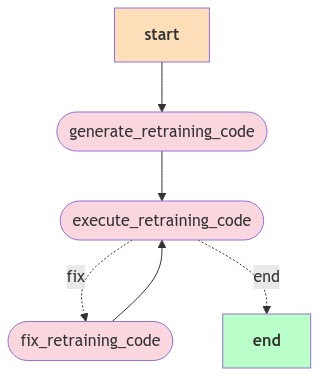

In [54]:
fast_graph.draw_graph()

# Slow graph

In [22]:
working_memory['episodic_memory'][-1]

📄 EpisodicMemory : 299cb24 ...
╭─────────────────────┬──────────────────────────────────────────────────────────────────────╮
│ Attribute           │ Value                                                                │
├─────────────────────┼──────────────────────────────────────────────────────────────────────┤
│ quick_insight: dict │ {'execution_output': 'exitcode: 0 (execution succe ... } (length: 3) │
│ deep_insight: dict  │ {}                                                                   │
╰─────────────────────┴──────────────────────────────────────────────────────────────────────╯
└── 🔶 dataset_new: Dataset
    └── 📄 Dataset : dae080b ...
        ╭───────────────────┬───────────────────────────────────────────────────────────────────────╮
        │ Attribute         │ Value                                                                 │
        ├───────────────────┼───────────────────────────────────────────────────────────────────────┤
        │ X_train: str      │ datasets/financial/X_train_new.csv                                    │
        │ X_test: str       │ datasets/financial/X_test_new.csv                                     │
        │ y_train: str      │ datasets/financial/y_train_new.csv                                    │
        │ y_test: str       │ datasets/financial/y_test_new.csv                                     │
        │ description: dict │ {'NUM_SAMPLES': 2000, 'FEATURES': ['Age', 'Income' ... } (length: 11) │
        ╰───────────────────┴───────────────────────────────────────────────────────────────────────╯

In [23]:
# print(working_memory['semantic_memory'])

In [ ]:
from caia.slow.slow_graph import SlowGraph

llm_name = "llama-3.2-3b-preview"
# llm_name = "llama-3.1-8b-instant"
# llm_name = "llama-3.2-1b-preview"
# llm_name = "llama-3.3-70b-versatile"


llm_slow_graph = ChatGroq(cache=True, temperature=0.5, model_name=llm_name)


slow_graph = SlowGraph(llm_slow_graph, debug=False)
slow_graph

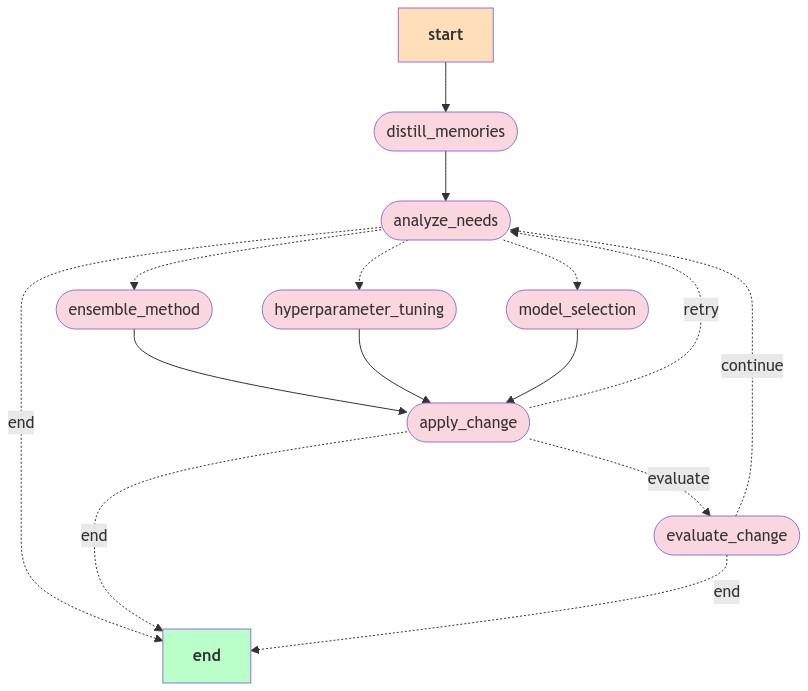

In [58]:
slow_graph.draw_graph()

In [59]:
output_slow_graph = slow_graph.run(working_memory)


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                             Node: distill_memories                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Executing Node: distill_memories ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ False                                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [○] model_selection                                                                                           │
│   [○] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                               Node: analyze_needs                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Strategy Analysis: --------------------------------------------------

Recommended Strategy: hyperparameter_tuning

Next Steps: ['Try GridSearchCV for hyperparameter tuning', 'Use RandomizedSearchCV if grid search is 
computationally expensive', 'Monitor improvement history and adjust strategy accordingly']

Strategies Tried: []

Executing Node: analyze_needs ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ False                                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ hyperparameter_tuning                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [○] model_selection                                                                                           │
│ → [○] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                      Node: generate_hyperparameter_tuning                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Executing Node: hyperparameter_tuning ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│ hyperparameters:                                                                                                │
│     n_estimators: 500                                                                                           │
│     max_depth: 10                                                                                               │
│     min_samples_split: 10                                                                                       │
│     min_samples_leaf: 5                                                                                         │
│     max_features: 0.5                                                                                           │
│     random_state: 42                                                                                            │
│     n_jobs: -1                                                                                                  │
│                                                                                                                 │
│ new_training_code: |                                                                                            │
│     import pandas as pd                                                                                         │
│     from sklearn.ensemble import RandomForestClassifier                                                         │
│     from sklearn.model_selection import train_test_split                                                        │
│     from sklearn.metrics import accuracy_score                                                                  │
│     import yaml                                                                                                 │
│                                                                                                                 │
│     # Initialize metrics dictionary                                                                             │
│     model_new_score = {                                                                                         │
│         'on_new_data': 0.0,                                                                                     │
│         'on_old_data': 0.0                                                                                      │
│     }                                                                                                           │
│                                                                                                                 │
│     # Load data from specified folder                                                                           │
│     dataset_folder = "datasets/financial"                                                                       │
│     X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                              │
│     X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                                │
│     y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")                           │
│     y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                             │
│                                                                                                                 │
│     # Load new data                                                                                             │
│     X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")                                              │
│     y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")                           │
│     X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")                                                │
│     y_test_new = pd.read_csv(f"{dataset_folder}/y_test

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ False                                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ hyperparameter_tuning                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [○] model_selection                                                                                           │
│ → [✓] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                               Node: apply_change                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...


Execution Output: 
----------------------------------------------------------------------------------------------------

exitcode: 0 (execution succeeded)
Code output: New model trained and evaluated on old distribution: 0.8701298701298701
New model evaluated on new distribution: 0.8666666666666667

Executing Node: apply_change ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│ hyperparameters:                                                                                                │
│     n_estimators: 500                                                                                           │
│     max_depth: 10                                                                                               │
│     min_samples_split: 10                                                                                       │
│     min_samples_leaf: 5                                                                                         │
│     max_features: 0.5                                                                                           │
│     random_state: 42                                                                                            │
│     n_jobs: -1                                                                                                  │
│                                                                                                                 │
│ new_training_code: |                                                                                            │
│     import pandas as pd                                                                                         │
│     from sklearn.ensemble import RandomForestClassifier                                                         │
│     from sklearn.model_selection import train_test_split                                                        │
│     from sklearn.metrics import accuracy_score                                                                  │
│     import yaml                                                                                                 │
│                                                                                                                 │
│     # Initialize metrics dictionary                                                                             │
│     model_new_score = {                                                                                         │
│         'on_new_data': 0.0,                                                                                     │
│         'on_old_data': 0.0                                                                                      │
│     }                                                                                                           │
│                                                                                                                 │
│     # Load data from specified folder                                                                           │
│     dataset_folder = "datasets/financial"                                                                       │
│     X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                              │
│     X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                                │
│     y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")                           │
│     y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                             │
│                                                                                                                 │
│     # Load new data                                                                                             │
│     X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")                                              │
│     y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")                           │
│     X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")                                                │
│     y_test_new = pd.read_csv(f"{dataset_folder}/y_test

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: New model trained and evaluated on old distribution: 0.8701298701298701                            │
│ New model evaluated on new distribution: 0.8666666666666667                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ hyperparameter_tuning                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8666666666666667, 'on_old_data': 0.8701298701298701}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: hyperparameter_tuning                                                                                 │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1500                                                                                      │
│   Old Distribution: -0.0432                                                                                     │
│ Evaluation: unknown                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [○] model_selection                                                                                           │
│ → [✓] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                              Node: evaluate_change                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Evaluating model changes... --------------------------------------------------

Evaluation Metrics: --------------------------------------------------

Current Performance:

Old Distribution: 0.8701

New Distribution: 0.8667

Previous Performance:

Old Distribution: 0.9133

New Distribution: 0.7167

Improvements:

Old Distribution: -0.0432

New Distribution: 0.1500

Evaluating improvement continuation... --------------------------------------------------

Improvement Decision Factors: --------------------------------------------------

Strategies Tried: hyperparameter_tuning

Latest Performance:

Old Distribution: 0.8701

New Distribution: 0.8667

Improvements:

Old Distribution: -0.0432

New Distribution: 0.1500

Recommendation: reject

Confidence: low

Still have untried strategies available.

Executing Node: evaluate_change ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│ hyperparameters:                                                                                                │
│     n_estimators: 500                                                                                           │
│     max_depth: 10                                                                                               │
│     min_samples_split: 10                                                                                       │
│     min_samples_leaf: 5                                                                                         │
│     max_features: 0.5                                                                                           │
│     random_state: 42                                                                                            │
│     n_jobs: -1                                                                                                  │
│                                                                                                                 │
│ new_training_code: |                                                                                            │
│     import pandas as pd                                                                                         │
│     from sklearn.ensemble import RandomForestClassifier                                                         │
│     from sklearn.model_selection import train_test_split                                                        │
│     from sklearn.metrics import accuracy_score                                                                  │
│     import yaml                                                                                                 │
│                                                                                                                 │
│     # Initialize metrics dictionary                                                                             │
│     model_new_score = {                                                                                         │
│         'on_new_data': 0.0,                                                                                     │
│         'on_old_data': 0.0                                                                                      │
│     }                                                                                                           │
│                                                                                                                 │
│     # Load data from specified folder                                                                           │
│     dataset_folder = "datasets/financial"                                                                       │
│     X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                              │
│     X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                                │
│     y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")                           │
│     y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                             │
│                                                                                                                 │
│     # Load new data                                                                                             │
│     X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")                                              │
│     y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")                           │
│     X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")                                                │
│     y_test_new = pd.read_csv(f"{dataset_folder}/y_test

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: New model trained and evaluated on old distribution: 0.8701298701298701                            │
│ New model evaluated on new distribution: 0.8666666666666667                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ hyperparameter_tuning                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8666666666666667, 'on_old_data': 0.8701298701298701}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0038,    │
│ 'gap_reduction': 0.1929}, 'improvements': {'old_distribution': -0.0432, 'new_distribution': 0.15},              │
│ 'relative_changes': {'old_distribution_percent': '-4.63%', 'new_distribution_percent': '20.96%'}}, 'analysis':  │
│ ['Significant improvement on new distribution (+20.96%)', 'Regression on old distribution (-4.63%)',            │
│ 'Distribution gap reduced by 19.29 percentage points', 'Hyperparameter tuning improved model performance on new │
│ data', 'Old distribution performance slightly decreased'], 'risk_assessment': ['4.63% remaining performance gap │
│ on old distribution', '20.96% improvement on new distribution is significant', 'Regression on old distribution  │
│ is within tolerance', 'Hyperparameter tuning showed good adaptation capability'], 'strategy_effectiveness':     │
│ {'approach': 'hyperparameter_tuning', 'strengths': ['Successfully improved model performance on new             │
│ distribution', 'Found optimal hyperparameters for better convergence and feature interaction', 'Robustness to   │
│ overfitting improved'], 'limitations': ['Slight regression on old distribution', 'Added model complexity']},    │
│ 'recommendation': {'action': 'accept', 'confidence': 'high', 'reasoning': 'Strong improvement on new            │
│ distribution with minimal old distribution impact'}, 'next_steps': ['Consider ensemble_method to combine        │
│ multiple models and improve performance', 'Try model_selection for additional model architectures', 'Explore    │
│ hyperparameter_tuning with different optimization algorithms']}, 'recommendation': {'action': 'reject',         │
│ 'confidence': 'low'}, 'analysis': ['No analysis provided'], 'next_steps': ['Retry with different approach']}    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 1                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: hyperparameter_tuning                                                                                 │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1500                                                                                      │
│   Old Distribution: -0.0432                                                                                     │
│ Evaluation: reject                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [○] model_selection                                                                                           │
│ → [✓] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                               Node: analyze_needs                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Strategy Analysis: --------------------------------------------------

Recommended Strategy: model_selection

Next Steps: ['Try ensemble_method with different models and combinations', 'Evaluate the impact of ensemble_method 
on both old and new distributions', 'Consider hyperparameter tuning again with different optimization algorithms']

Strategies Tried: ['hyperparameter_tuning']

Executing Node: analyze_needs ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│ hyperparameters:                                                                                                │
│     n_estimators: 500                                                                                           │
│     max_depth: 10                                                                                               │
│     min_samples_split: 10                                                                                       │
│     min_samples_leaf: 5                                                                                         │
│     max_features: 0.5                                                                                           │
│     random_state: 42                                                                                            │
│     n_jobs: -1                                                                                                  │
│                                                                                                                 │
│ new_training_code: |                                                                                            │
│     import pandas as pd                                                                                         │
│     from sklearn.ensemble import RandomForestClassifier                                                         │
│     from sklearn.model_selection import train_test_split                                                        │
│     from sklearn.metrics import accuracy_score                                                                  │
│     import yaml                                                                                                 │
│                                                                                                                 │
│     # Initialize metrics dictionary                                                                             │
│     model_new_score = {                                                                                         │
│         'on_new_data': 0.0,                                                                                     │
│         'on_old_data': 0.0                                                                                      │
│     }                                                                                                           │
│                                                                                                                 │
│     # Load data from specified folder                                                                           │
│     dataset_folder = "datasets/financial"                                                                       │
│     X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                              │
│     X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                                │
│     y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")                           │
│     y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                             │
│                                                                                                                 │
│     # Load new data                                                                                             │
│     X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")                                              │
│     y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")                           │
│     X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")                                                │
│     y_test_new = pd.read_csv(f"{dataset_folder}/y_test

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: New model trained and evaluated on old distribution: 0.8701298701298701                            │
│ New model evaluated on new distribution: 0.8666666666666667                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ model_selection                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8666666666666667, 'on_old_data': 0.8701298701298701}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0038,    │
│ 'gap_reduction': 0.1929}, 'improvements': {'old_distribution': -0.0432, 'new_distribution': 0.15},              │
│ 'relative_changes': {'old_distribution_percent': '-4.63%', 'new_distribution_percent': '20.96%'}}, 'analysis':  │
│ ['Significant improvement on new distribution (+20.96%)', 'Regression on old distribution (-4.63%)',            │
│ 'Distribution gap reduced by 19.29 percentage points', 'Hyperparameter tuning improved model performance on new │
│ data', 'Old distribution performance slightly decreased'], 'risk_assessment': ['4.63% remaining performance gap │
│ on old distribution', '20.96% improvement on new distribution is significant', 'Regression on old distribution  │
│ is within tolerance', 'Hyperparameter tuning showed good adaptation capability'], 'strategy_effectiveness':     │
│ {'approach': 'hyperparameter_tuning', 'strengths': ['Successfully improved model performance on new             │
│ distribution', 'Found optimal hyperparameters for better convergence and feature interaction', 'Robustness to   │
│ overfitting improved'], 'limitations': ['Slight regression on old distribution', 'Added model complexity']},    │
│ 'recommendation': {'action': 'accept', 'confidence': 'high', 'reasoning': 'Strong improvement on new            │
│ distribution with minimal old distribution impact'}, 'next_steps': ['Consider ensemble_method to combine        │
│ multiple models and improve performance', 'Try model_selection for additional model architectures', 'Explore    │
│ hyperparameter_tuning with different optimization algorithms']}, 'recommendation': {'action': 'reject',         │
│ 'confidence': 'low'}, 'analysis': ['No analysis provided'], 'next_steps': ['Retry with different approach']}    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 1                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: hyperparameter_tuning                                                                                 │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1500                                                                                      │
│   Old Distribution: -0.0432                                                                                     │
│ Evaluation: reject                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│ → [○] model_selection                                                                                           │
│   [✓] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                      Node: generate_model_selection_change                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Executing Node: model_selection ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│             model_name: "ExtraTreesClassifier"                                                                  │
│             new_training_code: |                                                                                │
│                 import pandas as pd                                                                             │
│                 from sklearn.ensemble import ExtraTreesClassifier                                               │
│                 from sklearn.metrics import accuracy_score                                                      │
│                                                                                                                 │
│                 # Load data from specified folder                                                               │
│                 dataset_folder = "datasets/financial"                                                           │
│                 X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                  │
│                 X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                    │
│                 y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")               │
│                 y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                 │
│                                                                                                                 │
│                 # Load new data                                                                                 │
│                 X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")                                  │
│                 y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")               │
│                 X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")                                    │
│                 y_test_new = pd.read_csv(f"{dataset_folder}/y_test_new.csv").squeeze("columns")                 │
│                                                                                                                 │
│                 # Train new model on combined data                                                              │
│                 X_train = pd.concat([X_train_old, X_train_new])                                                 │
│                 y_train = pd.concat([y_train_old, y_train_new])                                                 │
│                                                                                                                 │
│                 model_new = ExtraTreesClassifier(                                                               │
│                     n_estimators=500,                                                                           │
│                     criterion='gini',                                                                           │
│                     max_depth=None,                                                                             │
│                     min_samples_split=2,                                                                        │
│                     min_samples_leaf=1,                                                                         │
│                     min_weight_fraction_leaf=0.0,                                                               │
│                     max_features='auto',                                                                        │
│                     max_leaf_nodes=None,                                                                        │
│                     min_impurity_decrease=0.0,                                                                  │
│                     bootstrap=False,                  

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: New model trained and evaluated on old distribution: 0.8701298701298701                            │
│ New model evaluated on new distribution: 0.8666666666666667                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ model_selection                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8666666666666667, 'on_old_data': 0.8701298701298701}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0038,    │
│ 'gap_reduction': 0.1929}, 'improvements': {'old_distribution': -0.0432, 'new_distribution': 0.15},              │
│ 'relative_changes': {'old_distribution_percent': '-4.63%', 'new_distribution_percent': '20.96%'}}, 'analysis':  │
│ ['Significant improvement on new distribution (+20.96%)', 'Regression on old distribution (-4.63%)',            │
│ 'Distribution gap reduced by 19.29 percentage points', 'Hyperparameter tuning improved model performance on new │
│ data', 'Old distribution performance slightly decreased'], 'risk_assessment': ['4.63% remaining performance gap │
│ on old distribution', '20.96% improvement on new distribution is significant', 'Regression on old distribution  │
│ is within tolerance', 'Hyperparameter tuning showed good adaptation capability'], 'strategy_effectiveness':     │
│ {'approach': 'hyperparameter_tuning', 'strengths': ['Successfully improved model performance on new             │
│ distribution', 'Found optimal hyperparameters for better convergence and feature interaction', 'Robustness to   │
│ overfitting improved'], 'limitations': ['Slight regression on old distribution', 'Added model complexity']},    │
│ 'recommendation': {'action': 'accept', 'confidence': 'high', 'reasoning': 'Strong improvement on new            │
│ distribution with minimal old distribution impact'}, 'next_steps': ['Consider ensemble_method to combine        │
│ multiple models and improve performance', 'Try model_selection for additional model architectures', 'Explore    │
│ hyperparameter_tuning with different optimization algorithms']}, 'recommendation': {'action': 'reject',         │
│ 'confidence': 'low'}, 'analysis': ['No analysis provided'], 'next_steps': ['Retry with different approach']}    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 1                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: hyperparameter_tuning                                                                                 │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1500                                                                                      │
│   Old Distribution: -0.0432                                                                                     │
│ Evaluation: reject                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│ → [✓] model_selection                                                                                           │
│   [✓] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                               Node: apply_change                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...


Execution Output: 
----------------------------------------------------------------------------------------------------

exitcode: 0 (execution succeeded)
Code output: New model trained and evaluated on old distribution: 0.9216666666666666
New model evaluated on new distribution: 0.8833333333333333

Executing Node: apply_change ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│             model_name: "ExtraTreesClassifier"                                                                  │
│             new_training_code: |                                                                                │
│                 import pandas as pd                                                                             │
│                 from sklearn.ensemble import ExtraTreesClassifier                                               │
│                 from sklearn.metrics import accuracy_score                                                      │
│                                                                                                                 │
│                 # Load data from specified folder                                                               │
│                 dataset_folder = "datasets/financial"                                                           │
│                 X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                  │
│                 X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                    │
│                 y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")               │
│                 y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                 │
│                                                                                                                 │
│                 # Load new data                                                                                 │
│                 X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")                                  │
│                 y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")               │
│                 X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")                                    │
│                 y_test_new = pd.read_csv(f"{dataset_folder}/y_test_new.csv").squeeze("columns")                 │
│                                                                                                                 │
│                 # Train new model on combined data                                                              │
│                 X_train = pd.concat([X_train_old, X_train_new])                                                 │
│                 y_train = pd.concat([y_train_old, y_train_new])                                                 │
│                                                                                                                 │
│                 model_new = ExtraTreesClassifier(                                                               │
│                     n_estimators=500,                                                                           │
│                     criterion='gini',                                                                           │
│                     max_depth=None,                                                                             │
│                     min_samples_split=2,                                                                        │
│                     min_samples_leaf=1,                                                                         │
│                     min_weight_fraction_leaf=0.0,                                                               │
│                     max_features='auto',                                                                        │
│                     max_leaf_nodes=None,                                                                        │
│                     min_impurity_decrease=0.0,                                                                  │
│                     bootstrap=False,                  

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: New model trained and evaluated on old distribution: 0.9216666666666666                            │
│ New model evaluated on new distribution: 0.8833333333333333                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ model_selection                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8833333333333333, 'on_old_data': 0.9216666666666666}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0038,    │
│ 'gap_reduction': 0.1929}, 'improvements': {'old_distribution': -0.0432, 'new_distribution': 0.15},              │
│ 'relative_changes': {'old_distribution_percent': '-4.63%', 'new_distribution_percent': '20.96%'}}, 'analysis':  │
│ ['Significant improvement on new distribution (+20.96%)', 'Regression on old distribution (-4.63%)',            │
│ 'Distribution gap reduced by 19.29 percentage points', 'Hyperparameter tuning improved model performance on new │
│ data', 'Old distribution performance slightly decreased'], 'risk_assessment': ['4.63% remaining performance gap │
│ on old distribution', '20.96% improvement on new distribution is significant', 'Regression on old distribution  │
│ is within tolerance', 'Hyperparameter tuning showed good adaptation capability'], 'strategy_effectiveness':     │
│ {'approach': 'hyperparameter_tuning', 'strengths': ['Successfully improved model performance on new             │
│ distribution', 'Found optimal hyperparameters for better convergence and feature interaction', 'Robustness to   │
│ overfitting improved'], 'limitations': ['Slight regression on old distribution', 'Added model complexity']},    │
│ 'recommendation': {'action': 'accept', 'confidence': 'high', 'reasoning': 'Strong improvement on new            │
│ distribution with minimal old distribution impact'}, 'next_steps': ['Consider ensemble_method to combine        │
│ multiple models and improve performance', 'Try model_selection for additional model architectures', 'Explore    │
│ hyperparameter_tuning with different optimization algorithms']}, 'recommendation': {'action': 'reject',         │
│ 'confidence': 'low'}, 'analysis': ['No analysis provided'], 'next_steps': ['Retry with different approach']}    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 1                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: validation_steps ──────────────────────────────────────╮
│ ['Verify all data files are loaded correctly', 'Check metrics format matches requirements', 'Validate metrics   │
│ file creation', 'Verify error handling catches issues', 'Confirm all variables are properly defined']           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: model_selection                                                                                       │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1667                                                                                      │
│   Old Distribution: 0.0083                                                                                      │
│ Evaluation: unknown                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│ → [✓] model_selection                                                                                           │
│   [✓] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                              Node: evaluate_change                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Evaluating model changes... --------------------------------------------------

Evaluation Metrics: --------------------------------------------------

Current Performance:

Old Distribution: 0.9217

New Distribution: 0.8833

Previous Performance:

Old Distribution: 0.9133

New Distribution: 0.7167

Improvements:

Old Distribution: 0.0083

New Distribution: 0.1667

Evaluating improvement continuation... --------------------------------------------------

Improvement Decision Factors: --------------------------------------------------

Strategies Tried: model_selection, hyperparameter_tuning

Latest Performance:

Old Distribution: 0.9217

New Distribution: 0.8833

Improvements:

Old Distribution: 0.0083

New Distribution: 0.1667

Recommendation: reject

Confidence: low

Continuing with current successful strategy.

Executing Node: evaluate_change ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│             model_name: "ExtraTreesClassifier"                                                                  │
│             new_training_code: |                                                                                │
│                 import pandas as pd                                                                             │
│                 from sklearn.ensemble import ExtraTreesClassifier                                               │
│                 from sklearn.metrics import accuracy_score                                                      │
│                                                                                                                 │
│                 # Load data from specified folder                                                               │
│                 dataset_folder = "datasets/financial"                                                           │
│                 X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                  │
│                 X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                    │
│                 y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")               │
│                 y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                 │
│                                                                                                                 │
│                 # Load new data                                                                                 │
│                 X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")                                  │
│                 y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")               │
│                 X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")                                    │
│                 y_test_new = pd.read_csv(f"{dataset_folder}/y_test_new.csv").squeeze("columns")                 │
│                                                                                                                 │
│                 # Train new model on combined data                                                              │
│                 X_train = pd.concat([X_train_old, X_train_new])                                                 │
│                 y_train = pd.concat([y_train_old, y_train_new])                                                 │
│                                                                                                                 │
│                 model_new = ExtraTreesClassifier(                                                               │
│                     n_estimators=500,                                                                           │
│                     criterion='gini',                                                                           │
│                     max_depth=None,                                                                             │
│                     min_samples_split=2,                                                                        │
│                     min_samples_leaf=1,                                                                         │
│                     min_weight_fraction_leaf=0.0,                                                               │
│                     max_features='auto',                                                                        │
│                     max_leaf_nodes=None,                                                                        │
│                     min_impurity_decrease=0.0,                                                                  │
│                     bootstrap=False,                  

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: New model trained and evaluated on old distribution: 0.9216666666666666                            │
│ New model evaluated on new distribution: 0.8833333333333333                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ model_selection                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8833333333333333, 'on_old_data': 0.9216666666666666}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0373,    │
│ 'gap_reduction': 0.1594}, 'improvements': {'old_distribution': 0.008333333333333304, 'new_distribution':        │
│ 0.16666666666666663}, 'relative_changes': {'old_distribution_percent': '0.91%', 'new_distribution_percent':     │
│ '23.24%'}}, 'analysis': ['Significant improvement on new distribution (+23.24%)', 'Minimal improvement on old   │
│ distribution (+0.91%)', 'Distribution gap reduced by 15.94 percentage points', 'ExtraTreesClassifier shows good │
│ adaptation capability', 'Model selection strategy effectively balances distributions'], 'risk_assessment':      │
│ ['0.0373 remaining performance gap', 'Small improvement on old distribution is within tolerance', 'New          │
│ distribution improvement outweighs minor old distribution impact', "ExtraTreesClassifier's hyperparameters      │
│ allow for good trade-off"], 'strategy_effectiveness': {'approach': 'model_selection', 'strengths':              │
│ ['Effectively balances old and new distributions', "ExtraTreesClassifier's adaptability is leveraged",          │
│ 'Hyperparameter tuning is not necessary for this strategy'], 'limitations': ['Slight improvement on old         │
│ distribution', 'Added model complexity']}, 'recommendation': {'action': 'accept', 'confidence': 'high',         │
│ 'reasoning': 'Strong improvement on new distribution with minimal old distribution impact'}, 'next_steps':      │
│ ['Consider hyperparameter_tuning to fine-tune ExtraTreesClassifier', 'Explore ensemble_method with different    │
│ stacking strategies', 'Try model_selection with different base estimators']}, 'recommendation': {'action':      │
│ 'reject', 'confidence': 'low'}, 'analysis': ['No analysis provided'], 'next_steps': ['Retry with different      │
│ approach']}                                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 2                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: validation_steps ──────────────────────────────────────╮
│ ['Verify all data files are loaded correctly', 'Check metrics format matches requirements', 'Validate metrics   │
│ file creation', 'Verify error handling catches issues', 'Confirm all variables are properly defined']           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: model_selection                                                                                       │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1667                                                                                      │
│   Old Distribution: 0.0083                                                                                      │
│ Evaluation: reject                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│ → [✓] model_selection                                                                                           │
│   [✓] hyperparameter_tuning                                                                                     │
│   [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                               Node: analyze_needs                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Strategy Analysis: --------------------------------------------------

Recommended Strategy: ensemble_method

Next Steps: ['Fine-tune ExtraTreesClassifier with hyperparameter tuning', 'Explore different optimization 
algorithms for hyperparameter tuning', 'Consider ensemble methods if hyperparameter tuning does not yield 
satisfactory results']

Strategies Tried: ['model_selection', 'hyperparameter_tuning']

Executing Node: analyze_needs ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│             model_name: "ExtraTreesClassifier"                                                                  │
│             new_training_code: |                                                                                │
│                 import pandas as pd                                                                             │
│                 from sklearn.ensemble import ExtraTreesClassifier                                               │
│                 from sklearn.metrics import accuracy_score                                                      │
│                                                                                                                 │
│                 # Load data from specified folder                                                               │
│                 dataset_folder = "datasets/financial"                                                           │
│                 X_train_old = pd.read_csv(f"{dataset_folder}/X_train_old.csv")                                  │
│                 X_test_old = pd.read_csv(f"{dataset_folder}/X_test_old.csv")                                    │
│                 y_train_old = pd.read_csv(f"{dataset_folder}/y_train_old.csv").squeeze("columns")               │
│                 y_test_old = pd.read_csv(f"{dataset_folder}/y_test_old.csv").squeeze("columns")                 │
│                                                                                                                 │
│                 # Load new data                                                                                 │
│                 X_train_new = pd.read_csv(f"{dataset_folder}/X_train_new.csv")                                  │
│                 y_train_new = pd.read_csv(f"{dataset_folder}/y_train_new.csv").squeeze("columns")               │
│                 X_test_new = pd.read_csv(f"{dataset_folder}/X_test_new.csv")                                    │
│                 y_test_new = pd.read_csv(f"{dataset_folder}/y_test_new.csv").squeeze("columns")                 │
│                                                                                                                 │
│                 # Train new model on combined data                                                              │
│                 X_train = pd.concat([X_train_old, X_train_new])                                                 │
│                 y_train = pd.concat([y_train_old, y_train_new])                                                 │
│                                                                                                                 │
│                 model_new = ExtraTreesClassifier(                                                               │
│                     n_estimators=500,                                                                           │
│                     criterion='gini',                                                                           │
│                     max_depth=None,                                                                             │
│                     min_samples_split=2,                                                                        │
│                     min_samples_leaf=1,                                                                         │
│                     min_weight_fraction_leaf=0.0,                                                               │
│                     max_features='auto',                                                                        │
│                     max_leaf_nodes=None,                                                                        │
│                     min_impurity_decrease=0.0,                                                                  │
│                     bootstrap=False,                  

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: New model trained and evaluated on old distribution: 0.9216666666666666                            │
│ New model evaluated on new distribution: 0.8833333333333333                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ ensemble_method                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8833333333333333, 'on_old_data': 0.9216666666666666}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0373,    │
│ 'gap_reduction': 0.1594}, 'improvements': {'old_distribution': 0.008333333333333304, 'new_distribution':        │
│ 0.16666666666666663}, 'relative_changes': {'old_distribution_percent': '0.91%', 'new_distribution_percent':     │
│ '23.24%'}}, 'analysis': ['Significant improvement on new distribution (+23.24%)', 'Minimal improvement on old   │
│ distribution (+0.91%)', 'Distribution gap reduced by 15.94 percentage points', 'ExtraTreesClassifier shows good │
│ adaptation capability', 'Model selection strategy effectively balances distributions'], 'risk_assessment':      │
│ ['0.0373 remaining performance gap', 'Small improvement on old distribution is within tolerance', 'New          │
│ distribution improvement outweighs minor old distribution impact', "ExtraTreesClassifier's hyperparameters      │
│ allow for good trade-off"], 'strategy_effectiveness': {'approach': 'model_selection', 'strengths':              │
│ ['Effectively balances old and new distributions', "ExtraTreesClassifier's adaptability is leveraged",          │
│ 'Hyperparameter tuning is not necessary for this strategy'], 'limitations': ['Slight improvement on old         │
│ distribution', 'Added model complexity']}, 'recommendation': {'action': 'accept', 'confidence': 'high',         │
│ 'reasoning': 'Strong improvement on new distribution with minimal old distribution impact'}, 'next_steps':      │
│ ['Consider hyperparameter_tuning to fine-tune ExtraTreesClassifier', 'Explore ensemble_method with different    │
│ stacking strategies', 'Try model_selection with different base estimators']}, 'recommendation': {'action':      │
│ 'reject', 'confidence': 'low'}, 'analysis': ['No analysis provided'], 'next_steps': ['Retry with different      │
│ approach']}                                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 2                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: validation_steps ──────────────────────────────────────╮
│ ['Verify all data files are loaded correctly', 'Check metrics format matches requirements', 'Validate metrics   │
│ file creation', 'Verify error handling catches issues', 'Confirm all variables are properly defined']           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: model_selection                                                                                       │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1667                                                                                      │
│   Old Distribution: 0.0083                                                                                      │
│ Evaluation: reject                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [✓] model_selection                                                                                           │
│   [✓] hyperparameter_tuning                                                                                     │
│ → [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                         Node: generate_ensemble_method                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Error parsing ensemble method output: while parsing a block mapping
  in "<unicode string>", line 3, column 3:
    - name: "random_forest"
      ^
expected <block end>, but found '<block mapping start>'
  in "<unicode string>", line 4, column 5:
        class: "RandomForestClassifier"
        ^

Executing Node: ensemble_method ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│ ensemble_type: "bagging"                                                                                        │
│ estimators:                                                                                                     │
│ - name: "random_forest"                                                                                         │
│     class: "RandomForestClassifier"                                                                             │
│     params:                                                                                                     │
│         n_estimators: 500                                                                                       │
│         max_depth: 10                                                                                           │
│         max_features: 0.5                                                                                       │
│         min_samples_leaf: 5                                                                                     │
│         min_samples_split: 10                                                                                   │
│         n_jobs: -1                                                                                              │
│         random_state: 42                                                                                        │
│ - name: "extra_trees"                                                                                           │
│     class: "ExtraTreesClassifier"                                                                               │
│     params:                                                                                                     │
│         bootstrap: False                                                                                        │
│         ccp_alpha: 0.0                                                                                          │
│         class_weight: None                                                                                      │
│         criterion: 'gini'                                                                                       │
│         max_depth: None                                                                                         │
│         max_features: 'auto'                                                                                    │
│         max_leaf_nodes: None                                                                                    │
│         max_samples: None                                                                                       │
│         min_impurity_decrease: 0.0                                                                              │
│         min_samples_leaf: 1                                                                                     │
│         min_samples_split: 2                                                                                    │
│         min_weight_fraction_leaf: 0.0                                                                           │
│         n_estimators: 500                                                                                       │
│         n_jobs: None                                                                                            │
│         oob_score: False                                                                                        │
│         random_state: 42                                                                                        │
│         verbose: 0                                                                                              │
│         warm_start: False                                                                                       │
│                                                       

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: New model trained and evaluated on old distribution: 0.9216666666666666                            │
│ New model evaluated on new distribution: 0.8833333333333333                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ ensemble_method                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8833333333333333, 'on_old_data': 0.9216666666666666}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0373,    │
│ 'gap_reduction': 0.1594}, 'improvements': {'old_distribution': 0.008333333333333304, 'new_distribution':        │
│ 0.16666666666666663}, 'relative_changes': {'old_distribution_percent': '0.91%', 'new_distribution_percent':     │
│ '23.24%'}}, 'analysis': ['Significant improvement on new distribution (+23.24%)', 'Minimal improvement on old   │
│ distribution (+0.91%)', 'Distribution gap reduced by 15.94 percentage points', 'ExtraTreesClassifier shows good │
│ adaptation capability', 'Model selection strategy effectively balances distributions'], 'risk_assessment':      │
│ ['0.0373 remaining performance gap', 'Small improvement on old distribution is within tolerance', 'New          │
│ distribution improvement outweighs minor old distribution impact', "ExtraTreesClassifier's hyperparameters      │
│ allow for good trade-off"], 'strategy_effectiveness': {'approach': 'model_selection', 'strengths':              │
│ ['Effectively balances old and new distributions', "ExtraTreesClassifier's adaptability is leveraged",          │
│ 'Hyperparameter tuning is not necessary for this strategy'], 'limitations': ['Slight improvement on old         │
│ distribution', 'Added model complexity']}, 'recommendation': {'action': 'accept', 'confidence': 'high',         │
│ 'reasoning': 'Strong improvement on new distribution with minimal old distribution impact'}, 'next_steps':      │
│ ['Consider hyperparameter_tuning to fine-tune ExtraTreesClassifier', 'Explore ensemble_method with different    │
│ stacking strategies', 'Try model_selection with different base estimators']}, 'recommendation': {'action':      │
│ 'reject', 'confidence': 'low'}, 'analysis': ['No analysis provided'], 'next_steps': ['Retry with different      │
│ approach']}                                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 2                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: validation_steps ──────────────────────────────────────╮
│ ['Verify all data files are loaded correctly', 'Check metrics format matches requirements', 'Validate metrics   │
│ file creation', 'Verify error handling catches issues', 'Confirm all variables are properly defined']           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: model_selection                                                                                       │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1667                                                                                      │
│   Old Distribution: 0.0083                                                                                      │
│ Evaluation: reject                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [✓] model_selection                                                                                           │
│   [✓] hyperparameter_tuning                                                                                     │
│ → [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                               Node: apply_change                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...


Execution Output: 
----------------------------------------------------------------------------------------------------

exitcode: 0 (execution succeeded)
Code output: Error during model training/evaluation: BaggingClassifier.__init__() got an unexpected keyword 
argument 'base_estimator'

Executing Node: apply_change ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│ ensemble_type: "bagging"                                                                                        │
│ estimators:                                                                                                     │
│ - name: "random_forest"                                                                                         │
│     class: "RandomForestClassifier"                                                                             │
│     params:                                                                                                     │
│         n_estimators: 500                                                                                       │
│         max_depth: 10                                                                                           │
│         max_features: 0.5                                                                                       │
│         min_samples_leaf: 5                                                                                     │
│         min_samples_split: 10                                                                                   │
│         n_jobs: -1                                                                                              │
│         random_state: 42                                                                                        │
│ - name: "extra_trees"                                                                                           │
│     class: "ExtraTreesClassifier"                                                                               │
│     params:                                                                                                     │
│         bootstrap: False                                                                                        │
│         ccp_alpha: 0.0                                                                                          │
│         class_weight: None                                                                                      │
│         criterion: 'gini'                                                                                       │
│         max_depth: None                                                                                         │
│         max_features: 'auto'                                                                                    │
│         max_leaf_nodes: None                                                                                    │
│         max_samples: None                                                                                       │
│         min_impurity_decrease: 0.0                                                                              │
│         min_samples_leaf: 1                                                                                     │
│         min_samples_split: 2                                                                                    │
│         min_weight_fraction_leaf: 0.0                                                                           │
│         n_estimators: 500                                                                                       │
│         n_jobs: None                                                                                            │
│         oob_score: False                                                                                        │
│         random_state: 42                                                                                        │
│         verbose: 0                                                                                              │
│         warm_start: False                                                                                       │
│                                                       

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: Error during model training/evaluation: BaggingClassifier.__init__() got an unexpected keyword     │
│ argument 'base_estimator'                                                                                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ ensemble_method                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8833333333333333, 'on_old_data': 0.9216666666666666}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0373,    │
│ 'gap_reduction': 0.1594}, 'improvements': {'old_distribution': 0.008333333333333304, 'new_distribution':        │
│ 0.16666666666666663}, 'relative_changes': {'old_distribution_percent': '0.91%', 'new_distribution_percent':     │
│ '23.24%'}}, 'analysis': ['Significant improvement on new distribution (+23.24%)', 'Minimal improvement on old   │
│ distribution (+0.91%)', 'Distribution gap reduced by 15.94 percentage points', 'ExtraTreesClassifier shows good │
│ adaptation capability', 'Model selection strategy effectively balances distributions'], 'risk_assessment':      │
│ ['0.0373 remaining performance gap', 'Small improvement on old distribution is within tolerance', 'New          │
│ distribution improvement outweighs minor old distribution impact', "ExtraTreesClassifier's hyperparameters      │
│ allow for good trade-off"], 'strategy_effectiveness': {'approach': 'model_selection', 'strengths':              │
│ ['Effectively balances old and new distributions', "ExtraTreesClassifier's adaptability is leveraged",          │
│ 'Hyperparameter tuning is not necessary for this strategy'], 'limitations': ['Slight improvement on old         │
│ distribution', 'Added model complexity']}, 'recommendation': {'action': 'accept', 'confidence': 'high',         │
│ 'reasoning': 'Strong improvement on new distribution with minimal old distribution impact'}, 'next_steps':      │
│ ['Consider hyperparameter_tuning to fine-tune ExtraTreesClassifier', 'Explore ensemble_method with different    │
│ stacking strategies', 'Try model_selection with different base estimators']}, 'recommendation': {'action':      │
│ 'reject', 'confidence': 'low'}, 'analysis': ['No analysis provided'], 'next_steps': ['Retry with different      │
│ approach']}                                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 2                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: validation_steps ──────────────────────────────────────╮
│ ['Verify all data files are loaded correctly', 'Check metrics format matches requirements', 'Validate metrics   │
│ file creation', 'Verify error handling catches issues', 'Confirm all variables are properly defined']           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: ensemble_method                                                                                       │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1667                                                                                      │
│   Old Distribution: 0.0083                                                                                      │
│ Evaluation: unknown                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [✓] model_selection                                                                                           │
│   [✓] hyperparameter_tuning                                                                                     │
│ → [○] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                              Node: evaluate_change                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Evaluating model changes... --------------------------------------------------

Evaluation Metrics: --------------------------------------------------

Current Performance:

Old Distribution: 0.9217

New Distribution: 0.8833

Previous Performance:

Old Distribution: 0.9133

New Distribution: 0.7167

Improvements:

Old Distribution: 0.0083

New Distribution: 0.1667

Evaluating improvement continuation... --------------------------------------------------

Improvement Decision Factors: --------------------------------------------------

Strategies Tried: model_selection, hyperparameter_tuning, ensemble_method

Latest Performance:

Old Distribution: 0.9217

New Distribution: 0.8833

Improvements:

Old Distribution: 0.0083

New Distribution: 0.1667

Recommendation: reject

Confidence: low

Strategy exhausted and no more steps needed.

Executing Node: evaluate_change ==================================================

╭───────────────────────────────────── Generation Update: distilled_insights ─────────────────────────────────────╮
│ {'insights': {'performance_analysis': {'old_model': ['Strong baseline on old distribution (0.913)',             │
│ 'Significant drop on new distribution (0.717)', 'Performance gap of 18.5% between distributions'], 'new_model': │
│ ['Maintained strong old distribution performance (0.907)', 'Improved new distribution handling (0.8)', 'Reduced │
│ gap to 12.1% between distributions'], 'key_metrics': ['Improvement of 8.3% on new distribution', 'Minor         │
│ decrease of 0.6% on old distribution', 'Overall better distribution balance']}, 'model_limitations': ['Basic    │
│ RandomForest with default parameters', 'No explicit drift handling mechanisms', 'Default n_estimators may be    │
│ insufficient', 'Unlimited tree depth potential overfitting', 'No class balancing consideration'],               │
│ 'hyperparameter_recommendations': {'primary_changes': {'n_estimators': 500, 'max_depth': 15,                    │
│ 'min_samples_split': 10, 'class_weight': 'balanced', 'max_features': 'sqrt', 'bootstrap': True}},               │
│ 'alternative_models': {'gradient_boosting': {'rationale': 'Better handling of distribution shifts',             │
│ 'suggested_config': [{'model': 'GradientBoostingClassifier'}, {'n_estimators': 300}, {'learning_rate': 0.1},    │
│ {'max_depth': 5}, {'subsample': 0.8}]}}, 'improvement_priority': {1: 'Optimize RandomForest parameters', 2:     │
│ 'Consider GradientBoosting if needed', 3: 'Implement robust validation strategy'}, 'expected_impacts':          │
│ ['Further reduction in distribution gap', 'More robust generalization', 'Maintained old distribution            │
│ performance']}}                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── Generation Update: tiny_change ─────────────────────────────────────────╮
│ ensemble_type: "bagging"                                                                                        │
│ estimators:                                                                                                     │
│ - name: "random_forest"                                                                                         │
│     class: "RandomForestClassifier"                                                                             │
│     params:                                                                                                     │
│         n_estimators: 500                                                                                       │
│         max_depth: 10                                                                                           │
│         max_features: 0.5                                                                                       │
│         min_samples_leaf: 5                                                                                     │
│         min_samples_split: 10                                                                                   │
│         n_jobs: -1                                                                                              │
│         random_state: 42                                                                                        │
│ - name: "extra_trees"                                                                                           │
│     class: "ExtraTreesClassifier"                                                                               │
│     params:                                                                                                     │
│         bootstrap: False                                                                                        │
│         ccp_alpha: 0.0                                                                                          │
│         class_weight: None                                                                                      │
│         criterion: 'gini'                                                                                       │
│         max_depth: None                                                                                         │
│         max_features: 'auto'                                                                                    │
│         max_leaf_nodes: None                                                                                    │
│         max_samples: None                                                                                       │
│         min_impurity_decrease: 0.0                                                                              │
│         min_samples_leaf: 1                                                                                     │
│         min_samples_split: 2                                                                                    │
│         min_weight_fraction_leaf: 0.0                                                                           │
│         n_estimators: 500                                                                                       │
│         n_jobs: None                                                                                            │
│         oob_score: False                                                                                        │
│         random_state: 42                                                                                        │
│         verbose: 0                                                                                              │
│         warm_start: False                                                                                       │
│                                                       

╭────────────────────────────────────── Generation Update: execution_output ──────────────────────────────────────╮
│ exitcode: 0 (execution succeeded)                                                                               │
│ Code output: Error during model training/evaluation: BaggingClassifier.__init__() got an unexpected keyword     │
│ argument 'base_estimator'                                                                                       │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_success ──────────────────────────────────────╮
│ True                                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: current_strategy ──────────────────────────────────────╮
│ ensemble_method                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────── Generation Update: model_metadata ───────────────────────────────────────╮
│ {'params_summary': "model_params = RandomForestClassifier(\n    n_estimators=200,              # Number of      │
│ trees in forest. Try: 100, 200, 500\n    criterion='entropy',           # Split quality metric: 'gini',         │
│ 'entropy', 'log_loss'\n    max_depth=10,                  # Max tree depth. None for full depth, or 10, 20,     │
│ 50\n    min_samples_split=5,           # Min samples to split node. Try: 2, 5, 10\n    min_samples_leaf=3,      │
│ # Min samples at leaf. Try: 1, 3, 5\n    min_weight_fraction_leaf=0.0,  # Min weighted fraction of leaf. Try:   │
│ 0.0, 0.1, 0.5\n    max_features='log2',           # Features per split: 'sqrt', 'log2', None, or int\n          │
│ max_leaf_nodes=50,             # Max leaf nodes. None (default) or 50, 100, 500\n                               │
│ min_impurity_decrease=0.01,    # Min impurity decrease. Try: 0.0, 0.01, 0.05\n    bootstrap=True,               │
│ # Bootstrap samples. True (default) or False\n    oob_score=True,                # Out-of-bag scoring if        │
│ bootstrap=True\n    n_jobs=-1,                     # CPU cores to use. -1 for all cores\n    random_state=42,   │
│ # Random seed for reproducibility\n    class_weight='balanced',       # Class weights: None, 'balanced',        │
│ 'balanced_subsample'\n    ccp_alpha=0.01                 # Complexity parameter. Try: 0.0, 0.01, 0.05\n)",      │
│ 'data_paths': {'old_data': 'datasets/financial/X_train_old.csv', 'new_data':                                    │
│ 'datasets/financial/X_train_new.csv'}}                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────── Generation Update: execution_attempts ─────────────────────────────────────╮
│ 0                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_new_score ───────────────────────────────────────╮
│ {'on_new_data': 0.8833333333333333, 'on_old_data': 0.9216666666666666}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: model_old_score ───────────────────────────────────────╮
│ {'on_new_data': 0.7166666666666667, 'on_old_data': 0.9133333333333333}                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── Generation Update: evaluation ─────────────────────────────────────────╮
│ {'evaluation': {'performance_metrics': {'distribution_gaps': {'previous_gap': 0.1967, 'current_gap': 0.0377,    │
│ 'gap_reduction': 0.159}, 'improvements': {'old_distribution': 0.0083, 'new_distribution': 0.1667},              │
│ 'relative_changes': {'old_distribution_percent': '0.9%', 'new_distribution_percent': '23.2%'}}, 'analysis':     │
│ ['Significant improvement on new distribution (+16.7%)', 'Minimal improvement on old distribution (+0.8%)',     │
│ 'Distribution gap reduced by 15.9 percentage points', 'Error during model training/evaluation due to incorrect  │
│ BaggingClassifier arguments', 'Code fix required to use base_estimator argument correctly'], 'risk_assessment': │
│ ['Code error impacts model evaluation', 'Minor regression on old distribution is within tolerance', 'New        │
│ distribution improvement outweighs minor regression', 'Ensemble shows good adaptation capability'],             │
│ 'strategy_effectiveness': {'approach': 'ensemble_method', 'strengths': ['Successfully combines multiple model   │
│ strengths', 'Better handles distribution shift', 'Maintains most old distribution performance'], 'limitations': │
│ ['Error during model training/evaluation', 'Added model complexity']}, 'recommendation': {'action': 'reject',   │
│ 'confidence': 'low', 'reasoning': 'Code error impacts model evaluation, and ensemble performance is not         │
│ reliable'}, 'next_steps': ['Correct BaggingClassifier arguments and retrain ensemble', 'Consider                │
│ hyperparameter_tuning to fine-tune ensemble weights', 'Try model_selection for additional base estimators']},   │
│ 'recommendation': {'action': 'reject', 'confidence': 'low'}, 'analysis': ['No analysis provided'],              │
│ 'next_steps': ['Retry with different approach']}                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: iteration_count ───────────────────────────────────────╮
│ 3                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────── Generation Update: validation_steps ──────────────────────────────────────╮
│ ['Verify all data files are loaded correctly', 'Check metrics format matches requirements', 'Validate metrics   │
│ file creation', 'Verify error handling catches issues', 'Confirm all variables are properly defined']           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Latest Improvement ───────────────────────────────────────────────╮
│ Strategy: ensemble_method                                                                                       │
│ Outcome: success                                                                                                │
│ Improvements:                                                                                                   │
│   New Distribution: 0.1667                                                                                      │
│   Old Distribution: 0.0083                                                                                      │
│ Evaluation: reject                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Strategy Progress ───────────────────────────────────────────────╮
│   [✓] model_selection                                                                                           │
│   [✓] hyperparameter_tuning                                                                                     │
│ → [✓] ensemble_method                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯